# EDA Process
<hr style="border:2px solid black">

- This notebook serves to read and join the tables from different data set.
- The reader is expected to run the codes and try to understand the contents of the data files

In [ ]:
## A tagline is a short description or comment on a movie that is displayed on movie posters (or direct to video covers, etc.) to capture the essence of the movie, and ultimately make you watch the movie.

#### Ideas for joining the Tables
- ???

#### load packages

In [143]:
# !pip install mplcyberpunk

In [64]:
import sys

import io
import matplotlib.pyplot as plt
import mplcyberpunk\
# data analysis stack
import numpy as np
import pandas as pd

import time
import tkinter as tk


# data visualization stack
import seaborn as sns
import matplotlib.pyplot as plt
# import missingno as msno

%matplotlib inline
# import seaborn as sns
# sns.set_style('whitegrid')

# for data cleaning
from sklearn.impute import KNNImputer


# miscellaneous
import warnings
warnings.filterwarnings("ignore")


# Set display
pd.set_option('display.max_columns', None)

#### load data, first data set from
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/data

In [79]:
df_tmdb_credits = pd.read_csv('./data/tmdb_5000_credits.csv')

In [80]:
df_tmdb_movies = pd.read_csv('./data/tmdb_5000_movies.csv')

In [113]:
# df_tmdb_credits.head(2)

In [114]:
# df_tmdb_movies.head(2)

#### load data, Second data set from
https://grouplens.org/datasets/movielens/

In [2]:
df_ml_32m_rating = pd.read_csv('./data/ml-latest-small/ratings.csv')

In [206]:
# df_ml_32m_rating.head(100)

In [3]:
df_ml_32m_links = pd.read_csv('./data/ml-latest-small/links.csv')

In [45]:
df_ml_32m_movies = pd.read_csv('./data/ml-latest-small/movies.csv')

In [5]:
df_ml_32m_tags = pd.read_csv('./data/ml-latest-small/tags.csv')

In [6]:
# df_ml_32m_tags.userId.nunique(), df_ml_32m_rating.userId.nunique()

(58, 610)

#### ***Data Cleaning of Data Sets***
***Table Rating***

In [63]:
# df_ml_32m_rating.info()
# no missing value found

In [7]:
# here we convert the seconds (in timestamp column) into real time-stamp
from datetime import datetime

# Convert seconds to a datetime object
for i in range(len(df_ml_32m_rating.timestamp)):
    df_ml_32m_rating.loc[i, 'time_stamp'] = datetime.fromtimestamp(df_ml_32m_rating.loc[i, 'timestamp']) 

In [8]:
# now droppingh inplace the old timestamp col and rename the new one 
df_ml_32m_rating = df_ml_32m_rating.drop('timestamp', axis = 1, inplace = False)  

In [9]:
df_ml_32m_rating.head()

,userId,movieId,rating,time_stamp
0,1,1,4.0,2000-07-30 20:45:03
1,1,3,4.0,2000-07-30 20:20:47
2,1,6,4.0,2000-07-30 20:37:04
3,1,47,5.0,2000-07-30 21:03:35
4,1,50,5.0,2000-07-30 20:48:51


#### ***Data Cleaning of Data Sets***
***Table Links***

In [10]:
df_ml_32m_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [11]:
# HEre we define a imputation model to impute the table links

knn_imputer = KNNImputer()
knn_imputer.fit(df_ml_32m_links[['tmdbId']])
df_ml_32m_links['tmdbId'] = knn_imputer.transform( df_ml_32m_links[['tmdbId']] ).flatten()

In [12]:
df_ml_32m_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9742 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


#### ***Data Cleaning of Data Sets***
***Table Movie***

In [13]:
df_ml_32m_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [40]:
df_ml_32m_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [46]:
# HEre we try to divide a single title column into two columns, title and released year
import re

movies_no_yr = []
for i in range(len(df_ml_32m_movies.title)):

# # Sample string
    string = df_ml_32m_movies.loc[i, 'title']

# # Regular expression pattern to find a 4-digit year
    pattern = r'\b((19|20)\d{2}\b)'
    # pattern_yr_ps = r'\b(19|20)\d{2}\b'
# # Search for the pattern in the string
    match = re.search(pattern, string)
  

    if match:
        year = match.group()
        df_ml_32m_movies.loc[i, 'released_yr'] = int(year)
        df_ml_32m_movies.loc[i, 'title'] = df_ml_32m_movies.loc[i, 'title'].replace(f'({year})','')
#     print("Year found:", year)
    else:
         movies_no_yr.append(title)


In [49]:
# here we turn the column genres into a column of lists
df_ml_32m_movies.genres = df_ml_32m_movies.genres.str.split('|')
# now for each row we have alist of genres for each movies

In [65]:
# df_ml_32m_movies.released_yr.unique()

In [50]:
df_ml_32m_movies.head(5)

,movieId,title,genres,released_yr
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995.0
4,5,Father of the Bride Part II,[Comedy],1995.0


#### ***Data Cleaning of Data Sets***
***Table Tags***

In [18]:
# # Here wes use drop the rows with simmilar values for userID and movieId for tag table
# df_ml_32m_tags_temp = df_ml_32m_tags.drop_duplicates(subset = ['userId','movieId'], ignore_index=True)

In [176]:
df_ml_32m_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [184]:
df_ml_32m_tags.head()

,userId,movieId,tag,time_stamp
0,2,60756,funny,2015-10-24 21:29:54
1,2,60756,Highly quotable,2015-10-24 21:29:56
2,2,60756,will ferrell,2015-10-24 21:29:52
3,2,89774,Boxing story,2015-10-24 21:33:27
4,2,89774,MMA,2015-10-24 21:33:20


In [183]:
# here we convert teh seconds (in timestamp column) into real time-stamp
from datetime import datetime

# Convert seconds to a datetime object
for i in range(len(df_ml_32m_tags.timestamp)):
    df_ml_32m_tags.loc[i, 'time_stamp'] = datetime.fromtimestamp(df_ml_32m_tags.loc[i, 'timestamp'])

df_ml_32m_tags 

#### ***Vizulization of Data Sets***
***Table Rating***

In [84]:
df_ml_32m_rating.head()

,userId,movieId,rating,time_stamp
0,1,1,4.0,2000-07-30 20:45:03
1,1,3,4.0,2000-07-30 20:20:47
2,1,6,4.0,2000-07-30 20:37:04
3,1,47,5.0,2000-07-30 21:03:35
4,1,50,5.0,2000-07-30 20:48:51


In [70]:
# n_rating = df_ml_32m_rating['rating'].nunique()
# n_rating

In [106]:
# # distribution of Rating
# sns.set_style("whitegrid")

# n_rating = df_ml_32m_rating['rating'].nunique()

# fig, ax0 = plt.subplots(1,1, figsize = (10,8))

# df_ml_32m_rating['rating'].hist(bins=n_rating, color='skyblue', edgecolor='black', alpha=0.7)

# ax0.set_xlabel('rating',  fontsize = 15.0, fontweight = 'bold')
# ax0.set_ylabel('Number of Rating',  fontsize = 15.0, fontweight = 'bold')

# ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6)

# ax0.spines['top'].set_linewidth(2)
# ax0.spines['right'].set_linewidth(2)
# ax0.spines['bottom'].set_linewidth(2)
# ax0.spines['left'].set_linewidth(2)
# plt.show()

ValueError: keyword fontweight is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

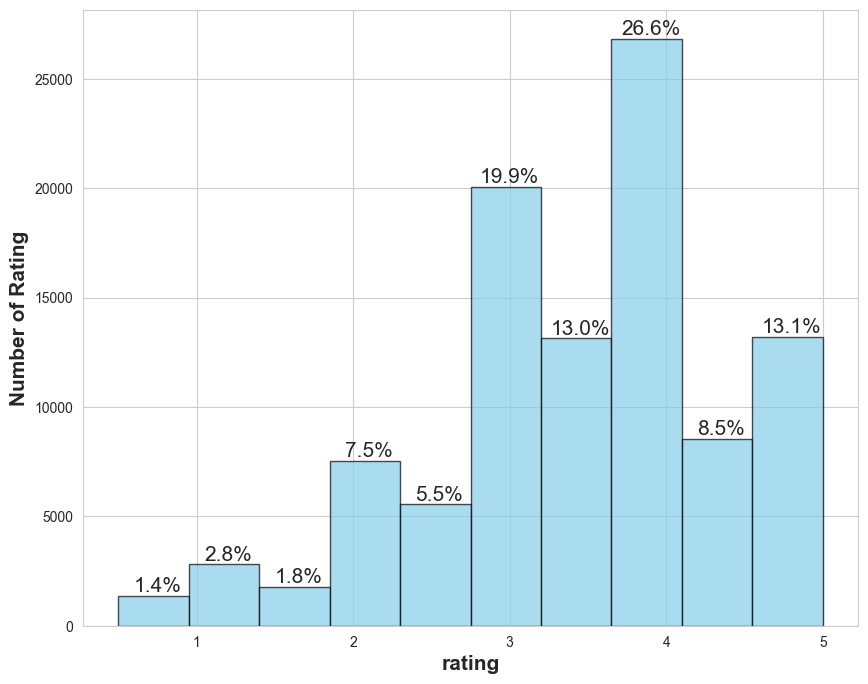

In [119]:
# distribution of Rating
sns.set_style("whitegrid")

n_rating = df_ml_32m_rating['rating'].nunique()

fig, ax0 = plt.subplots(1,1, figsize = (10,8))


n, bins, patches = plt.hist(df_ml_32m_rating['rating'], bins=n_rating, color='skyblue', edgecolor='black', alpha=0.7)

# Calculate total count for percentage calculation
total = n.sum()

# Annotate each bar with percentage
for count, bin_edge in zip(n, bins):
    # Calculate the position for each label
    percentage = (count / total) * 100
    plt.text(bin_edge + 0.25, count, f'{percentage:.1f}%', ha='center', va='bottom', fontsize = 15.0, fontweight = 10)
    
ax0.set_xlabel('rating',  fontsize = 15.0, fontweight = 'bold')
ax0.set_ylabel('Number of Rating',  fontsize = 15.0, fontweight = 'bold')

ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6, labelsize = 15, fontweight = 10)

ax0.spines['top'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)
plt.show()

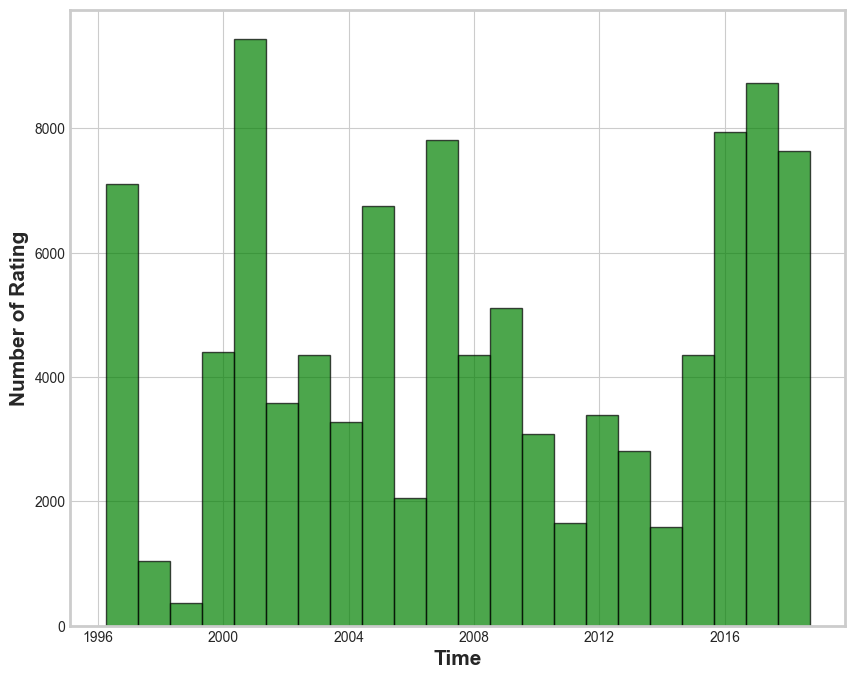

In [83]:
# distribution of timestamps

from datetime import datetime

sns.set_style("whitegrid")
# number of year in the time period ratings are recorded
no_year = df_ml_32m_rating['time_stamp'].max().year - df_ml_32m_rating['time_stamp'].min().year
fig, ax0 = plt.subplots(1,1, figsize = (10,8))

df_ml_32m_rating['time_stamp'].hist(bins=no_year, color='green', edgecolor='black', alpha=0.7)

ax0.set_xlabel('Year',  fontsize = 15.0, fontweight = 'bold')
ax0.set_ylabel('Number of Rating',  fontsize = 15.0, fontweight = 'bold')

ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6)

ax0.spines['top'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)
plt.show()

In [92]:
df_ml_32m_rating.movieId.unique(), df_ml_32m_rating.movieId.nunique()

(array([     1,      3,      6, ..., 160836, 163937, 163981], dtype=int64),
 9724)

In [93]:
df_ml_32m_movies.movieId.unique(), df_ml_32m_movies.movieId.nunique()

(array([     1,      2,      3, ..., 193585, 193587, 193609], dtype=int64),
 9742)

In [100]:
i = 0
for movieId in df_ml_32m_rating.movieId.unique():
    if movieId in df_ml_32m_movies.movieId.unique():
        i= i + 1
print(i)


9724


In [102]:
# df_ml_32m_rating.shape

(100836, 4)

In [101]:

df = df_ml_32m_rating.movieId.isin(df_ml_32m_movies.movieId)
df.value_counts()

movieId
True    100836
Name: count, dtype: int64

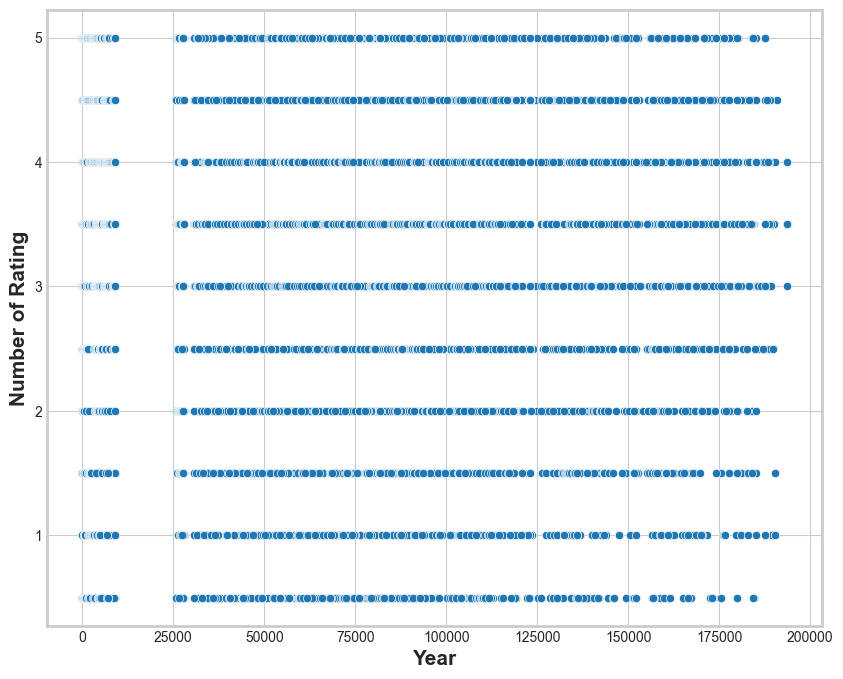

In [87]:
# scatter plot of rates and moviId

from datetime import datetime

sns.set_style("whitegrid")

fig, ax0 = plt.subplots(1,1, figsize = (10,8))

sns.scatterplot(x='movieId', y='rating', data=df_ml_32m_rating)

ax0.set_xlabel('Year',  fontsize = 15.0, fontweight = 'bold')
ax0.set_ylabel('Number of Rating',  fontsize = 15.0, fontweight = 'bold')

ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6)

ax0.spines['top'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)
plt.show()

#### ***Vizulization of Data Sets***
***Table Movies***

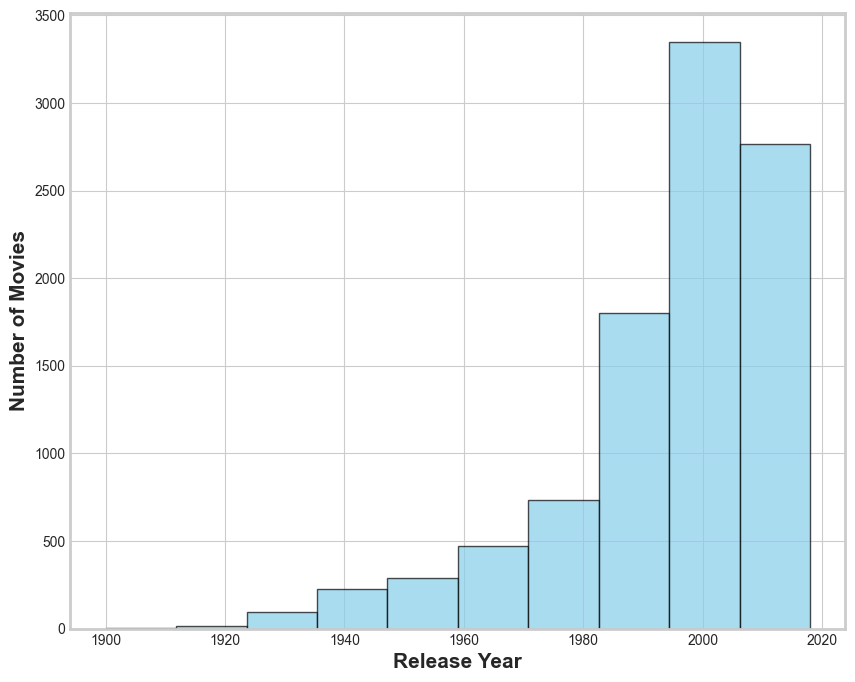

In [93]:
# Distribution of Released year
sns.set_style("whitegrid")

fig, ax0 = plt.subplots(1,1, figsize = (10,8))

df_ml_32m_movies['release_yr'].hist(bins=10, color='skyblue', edgecolor='black', alpha=0.7)

ax0.set_xlabel('Release Year',  fontsize = 15.0, fontweight = 'bold')
ax0.set_ylabel('Number of Movies',  fontsize = 15.0, fontweight = 'bold')

ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6)

ax0.spines['top'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)
plt.show()




In [58]:
df_ml_32m_movies_genres_flatten = df_ml_32m_movies.genres.explode().astype(str)

df_ml_32m_movies_genres_flatten.unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [61]:
df_ml_32m_movies_genres_flatten.value_counts()

genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64

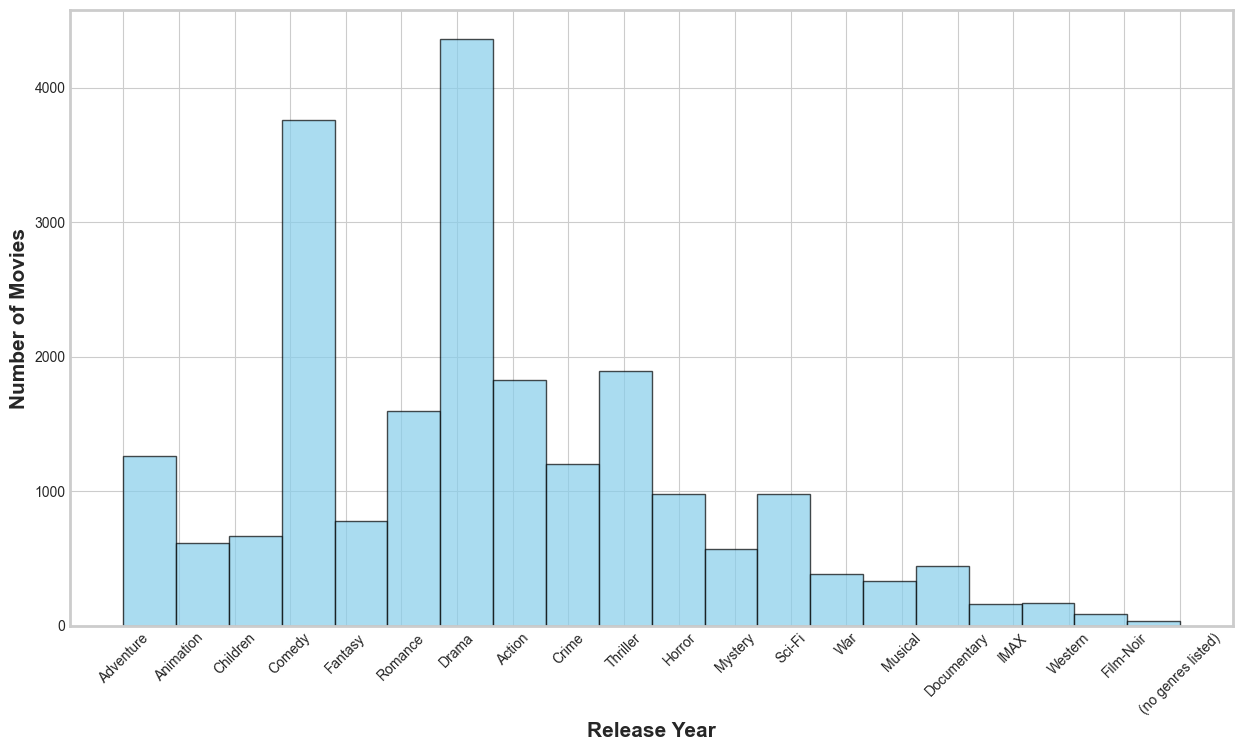

In [60]:
# plotting a histogram of genres of movies
sns.set_style("whitegrid")
#
df_ml_32m_movies_genres_flatten = df_ml_32m_movies.genres.explode().astype(str)

n_genres = df_ml_32m_movies_genres_flatten.nunique()

fig, ax0 = plt.subplots(1,1, figsize = (15,8))


df_ml_32m_movies_genres_flatten.hist(bins = n_genres, color='skyblue', edgecolor='black', alpha=0.7)

ax0.set_xlabel('Release Year',  fontsize = 15.0, fontweight = 'bold', )
ax0.set_ylabel('Number of Movies',  fontsize = 15.0, fontweight = 'bold')

ax0.tick_params(axis='both', which = 'both', direction = 'in', width = 3, length = 6)

plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

ax0.spines['top'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)
plt.show()



# flattened_values = 

# # Plot histogram
# plt.hist(flattened_values, bins=10)
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.title('Histogram of Flattened List Column')
# plt.show()


In [13]:
# Here wes use drop the rows with simmilar values for userID and movieId for rating table
df_ml_32m_rating_temp = df_ml_32m_rating.drop_duplicates(subset = ['userId','movieId'])

In [14]:
df_ml_32m_rating_temp.shape

(32000204, 4)

In [149]:
# here we use groupby method to group the data set based on movieId
df_ml_32m_rating_gb_movieId = df_ml_32m_rating.groupby('movieId').mean()

In [150]:
df_ml_32m_rating_gb_movieId.tail()

,userId,rating,timestamp
movieId,,,
292731,50685.0,4.0,1.697075e+09
292737,165364.0,1.5,1.697146e+09
292753,150812.0,4.0,1.697141e+09
292755,91097.0,1.0,1.697145e+09
292757,171418.0,3.5,1.697149e+09


In [208]:
# df_ml_32m_rating_gb_movieId.shape

In [209]:
# df_ml_32m_rating.shape

In [151]:
# here we turn the index values into a values of a new columnb
df_ml_32m_rating_gb_movieId['movieId']=df_ml_32m_rating_gb_movieId.index.values.tolist()

In [152]:
df_ml_32m_rating_gb_movieId.shape

(84432, 4)

In [210]:
# df_ml_32m_tags.shape

In [188]:
# df_ml_32m_tags.head()

In [140]:
# here we use groupby method to group the data set based on movieId
df_ml_32m_tags_gb_movieId = df_ml_32m_tags.groupby('movieId')['tag'].agg(pd.Series.mode).to_frame()

In [183]:

df_ml_32m_tags_gb_movieId['movieId'] = df_ml_32m_tags_gb_movieId.index.values.tolist()

In [211]:
# df_ml_32m_tags_gb_movieId.tail()

In [212]:
# df_ml_32m_tags_gb_movieId.shape

In [144]:
# df_ml_32m_movies.title.nunique()

In [213]:
# df_ml_32m_rating.shape, df_ml_32m_links.shape, df_ml_32m_movies.shape, df_ml_32m_tags.shape

In [214]:
# df_ml_32m_rating_gb_movieId.shape, df_ml_32m_links.shape, df_ml_32m_movies.shape, df_ml_32m_tags_gb_movieId.shape

In [215]:
# df_ml_32m_rating.columns, df_ml_32m_links.columns, df_ml_32m_movies.columns, df_ml_32m_tags.columns

In [171]:
# df_ml_32m_rating.userId.nunique(), df_ml_32m_tags.userId.nunique()

In [170]:
# df_ml_32m_rating.movieId.nunique(), df_ml_32m_tags.movieId.nunique(), df_ml_32m_links.movieId.nunique(), df_ml_32m_movies.movieId.nunique()

In [154]:
# df_ml_32m_rating.head(2)

In [11]:
# df_ml_32m_links.head()

In [155]:
# df_ml_32m_movies.head()

In [13]:
# df_ml_32m_tags.head(4)

#### Merging Tables
Table2: id - This is infact the movie_id as in the first dataset.

In [21]:
df_ml_32m_links.columns, df_ml_32m_movies.columns

(Index(['movieId', 'imdbId', 'tmdbId'], dtype='object'),
 Index(['movieId', 'title', 'genres'], dtype='object'))

In [156]:
# Because of lack of not enough RAM, we break the largest table, df_ml_32m_rating, into different pecies and do teh merging
# df_ml_32m_rating.rating.unique().tolist()

In [46]:
# def slicing_dataframe(df, column):
#     """ It slices up a data frame base on the number of unique item in column"""
#     uniques = df[column].unique().tolist()
#     print(uniques)
#     # sys.exit()
#     list = []
#     for unique in uniques:
#         print(unique)
#         list.append(df[df[column] == unique ])
#     return list

In [157]:
# list = slicing_dataframe(df_ml_32m_rating, 'rating')

In [158]:
# for i in range(len(list)):
#  print(list[i].shape)

In [59]:
df_ml_32m_links.columns, df_ml_32m_tags.columns

(Index(['movieId', 'imdbId', 'tmdbId'], dtype='object'),
 Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object'))

In [173]:
df_ml_32m_rating_gb_movieId.shape , df_ml_32m_links.shape , df_ml_32m_movies.shape , df_ml_32m_tags_gb_movieId.shape 

((84432, 4), (87585, 3), (87585, 3), (51323, 2))

In [172]:
df_ml_32m_rating_gb_movieId.columns, df_ml_32m_links.columns, df_ml_32m_movies.columns, df_ml_32m_tags_gb_movieId.columns

(Index(['userId', 'rating', 'timestamp', 'movieId'], dtype='object'),
 Index(['movieId', 'imdbId', 'tmdbId'], dtype='object'),
 Index(['movieId', 'title', 'genres'], dtype='object'),
 Index(['tag', 'movieId'], dtype='object'))

In [187]:
# result = df_ml_32m_links.join(df_ml_32m_movies, how='left', on='movieId')
result_1 = df_ml_32m_tags_gb_movieId.merge(df_ml_32m_rating_gb_movieId, how='left', on='movieId')
result_2 = result_1.merge(df_ml_32m_movies, how='left', on='movieId')
result = result_2.merge(df_ml_32m_links, how='left', on='movieId')
print(result)
sys.exit()
# result = result_2
# for i in range(len(list)):
#     print(i)
#     result = pd.merge(result, list[i] , how='left', on='movieId')
# df_ml_32m = result

ValueError: 'movieId' is both an index level and a column label, which is ambiguous.

In [30]:
result.shape

(87585, 5)

In [18]:
# # here we join the tables based on the similar column shared by all
# df_ml_32m = df_ml_32m_links.join(df_ml_32m_movies, on=['movieId'])
# # \
# # .join(df_ml_32m_tags, on='movieId', how='left').join(df_ml_32m_rating, on='movieId', how='left')

ValueError: columns overlap but no suffix specified: Index(['movieId'], dtype='object')